In [49]:
from catboost import CatBoostClassifier
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:

data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target



In [51]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [52]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [53]:

model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=8, loss_function="MultiClass", verbose=0)
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)


In [54]:

y_pred = model.predict(X_test)


In [55]:

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



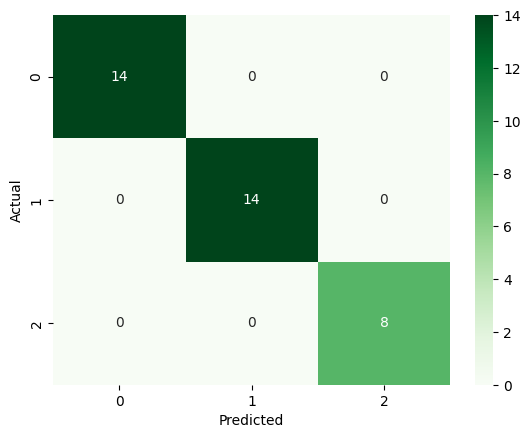

In [56]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()